In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read data frame
agn_fit_data = pd.read_csv("AGN_ZTF_lcs_fits_BASS_data-old.csv")
#agn_fit_data

# note: lines with bad data 214,250,278,281,295,296,300,302,308,309,315,320,321
# because data was formated as '1, 2, 3, ... 8, 9, 10'

In [4]:
# calculate snr for each row in the data frame
data_points = []
snr = []

flag = [float('inf')]

# Converts a string into a float list.
# String must be in the following format:
# '[1.01, 2.02, 3.03, 4.04]'
# Returns an array of len=1 with the one index='inf' if the String
# cannont be converted into a list of floats
def convert_to_float_list(str_list):
    str_list = str_list.replace('[', '')
    str_list = str_list.replace(']', '')
    
    try:
        return [float(i) for i in str_list.split()]
    except ValueError:
        return flag

# index each AGN in agn_fit_data and calculate SNR
for index, row in agn_fit_data.iterrows():
    # get data from row
    y = row['Magnitudes']
    err = row['Mag Errors']
    
    # convert into float lists
    y = convert_to_float_list(y)
    err = convert_to_float_list(err)
    
    # mean of mag and err
    if y != flag:
        mean_y = np.mean(y)
        mean_err = np.mean(err)
        snr_row = mean_y / mean_err
    else:
        snr_row = np.sqrt(-1)
    
    # save data
    data_points.append(len(y))
    snr.append(snr_row)

<ipython-input-4-db13e15ad937>:37: RuntimeWarning: invalid value encountered in sqrt
  snr_row = np.sqrt(-1)


In [5]:
# add snr and light curve lengths to dataframe
agn_fit_data['SNR'] = snr
agn_fit_data['LC Length'] = data_points

(0.0, 1500.0)

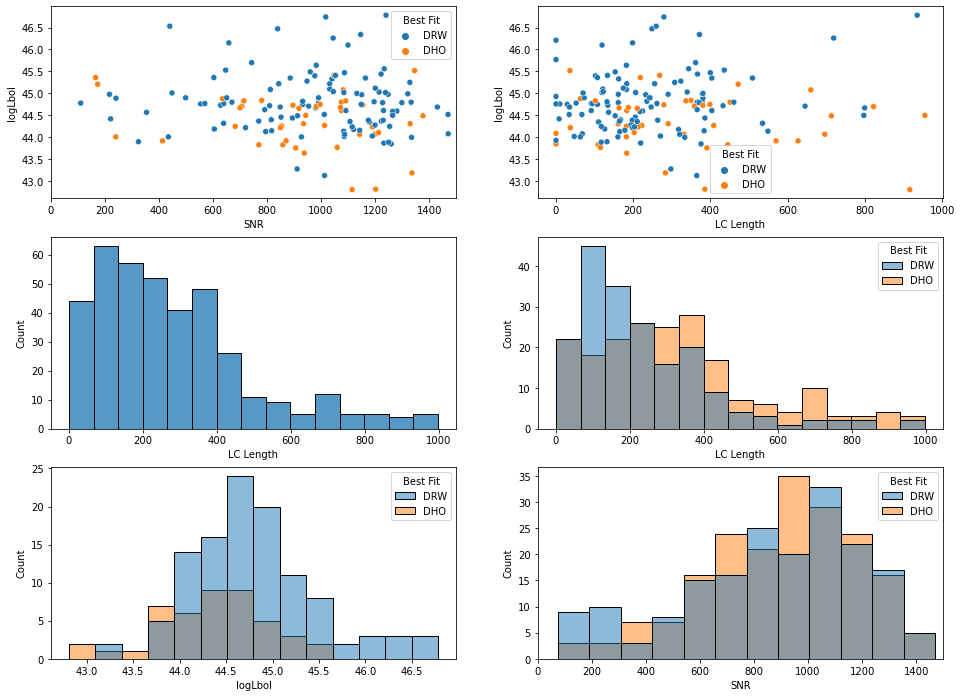

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

########
# line 0
########

# SNR vs LBol
sns.scatterplot(data=agn_fit_data, x='SNR', y ='logLbol', hue='Best Fit', ax=axs[0,0])
axs[0, 0].set_xlim(0, 1500) 
# note: there are some outliers

# LC Length vs LBol
sns.scatterplot(data=agn_fit_data, x='LC Length', y ='logLbol', hue='Best Fit', ax=axs[0,1])

########
# line 1
########

# histogram of LC Length
sns.histplot(data=agn_fit_data, x='LC Length', ax=axs[1,0])

# histogram of LC Length for best fit
sns.histplot(data=agn_fit_data, x='LC Length', hue='Best Fit', ax=axs[1,1])

########
# line 2
########

# histogram of LBol for best fit
sns.histplot(data=agn_fit_data, x='logLbol', hue='Best Fit', ax=axs[2,0])

# histogram of SNR for best fit
sns.histplot(data=agn_fit_data, x='SNR', hue='Best Fit', ax=axs[2,1])
axs[2, 1].set_xlim(0, 1500) 
# note: there are some outliers

#plt.savefig('snr-plots.png')

[None]

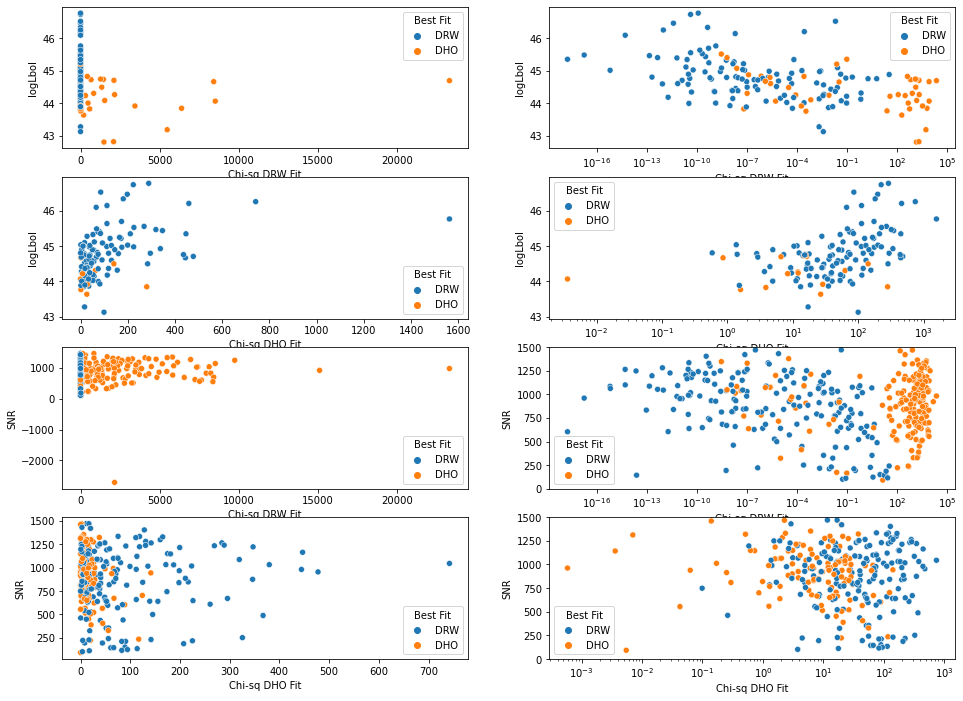

In [43]:
fig, axs = plt.subplots(4, 2, figsize=(16, 12))

########
# line 0
########

# chi-squared (DRW) vs LBol
sns.scatterplot(data=agn_fit_data, x='Chi-sq DRW Fit', y ='logLbol', hue='Best Fit', ax=axs[0, 0])

# chi-squared (DRW) vs LBol (scaled logarithmically)
sns.scatterplot(data=agn_fit_data, x='Chi-sq DRW Fit', y ='logLbol', hue='Best Fit', ax=axs[0, 1])
axs[0, 1].set(xscale='log')

########
# line 1
########

# chi-squared (DHO) vs LBol
sns.scatterplot(data=agn_fit_data, x='Chi-sq DHO Fit', y ='logLbol', hue='Best Fit', ax=axs[1, 0])

# chi-squared (DHO) vs LBol (scaled logarithmically)
sns.scatterplot(data=agn_fit_data, x='Chi-sq DHO Fit', y ='logLbol', hue='Best Fit', ax=axs[1, 1])
axs[1, 1].set(xscale='log')

########
# line 2
########

# chi-squared (DRW) vs SNR
sns.scatterplot(data=agn_fit_data, x='Chi-sq DRW Fit', y ='SNR', hue='Best Fit', ax=axs[2, 0])

# chi-squared (DRW) vs SNR (scaled logarithmically)
sns.scatterplot(data=agn_fit_data, x='Chi-sq DRW Fit', y ='SNR', hue='Best Fit', ax=axs[2, 1])
axs[2, 1].set_ylim(0, 1500) 
axs[2, 1].set(xscale='log')

########
# line 3
########

# chi-squared (DHO) vs SNR
sns.scatterplot(data=agn_fit_data, x='Chi-sq DHO Fit', y ='SNR', hue='Best Fit', ax=axs[3, 0])

# chi-squared (DHO) vs SNR (scaled logarithmically)
sns.scatterplot(data=agn_fit_data, x='Chi-sq DHO Fit', y ='SNR', hue='Best Fit', ax=axs[3, 1])
axs[3, 1].set_ylim(0, 1500) 
axs[3, 1].set(xscale='log')